# Linear Channel Estimation:
### The model:
$y[n] = h[n]*x[n]+e[n]$ where $h[n]$ is some FIR of some unknown linear channel. e[n] is assumed to be zero mean AWGN
Given x[n] and y[n], we want to estimate h[n]. Also we want to find h[n] with minimum power.
### The solution:
We can obtain an h[n] that satisfies the above requirements by a ridge regression with regularisation.
The regularisation can be controlled by a regularised hyperparameter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from scipy.io.wavfile import read, write

(-1000, 1000)

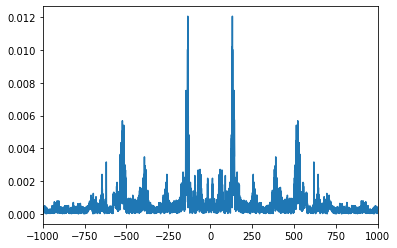

In [38]:
fs, x = read('test_hello.wav')
x = x[:,0]
max_ = np.max(np.abs(x))
x = (x/max_).astype(np.float32)
f = np.linspace(-0.5*fs,0.5*fs,len(x)+1)[:-1]
X = (1/len(x))*np.fft.fftshift(np.fft.fft(x))
plt.plot(f,np.abs(X))
plt.xlim([-1000,1000])

In [39]:
del X, f

### Filter design 
We design a lowpass filter of cutoff frequency of 200Hz. That would mean a time domain width of around 5ms. For a 16KHz sampled sound it would be about 80 TAPs.
Then we have an echo system, which is cascaded after the lowpass filter. We set the delays to be 0.01, 0.005 seconds with amplitudes of 0.3 and -0.1 respectively

In [54]:
from scipy import signal

In [41]:
import numpy as np
import matplotlib.pyplot as plt

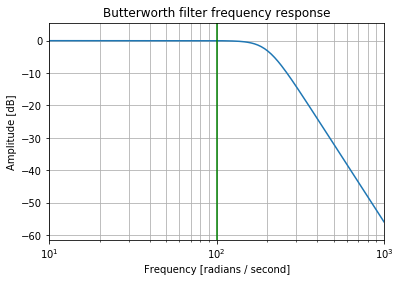

In [8]:
fs = 16000
b, a = signal.butter(4, 200, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [9]:
len(b)

1

In [10]:
b

array([1.6e+09])

In [11]:
a

array([1.00000000e+00, 5.22625186e+02, 1.36568542e+05, 2.09050074e+07,
       1.60000000e+09])

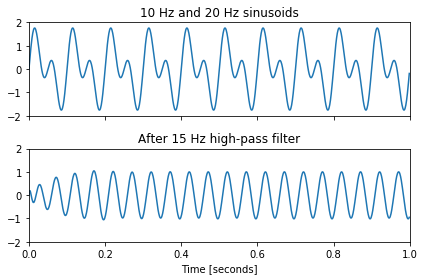

In [25]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [56]:
z,p,k = signal.butter(4, 400, 'lp', fs=44100, output='zpk')

In [57]:
z

array([-1., -1., -1., -1.])

In [58]:
p

array([0.97707866+0.05150112j, 0.94846475+0.02070774j,
       0.94846475-0.02070774j, 0.97707866-0.05150112j])

In [59]:
k

6.126494301762687e-07

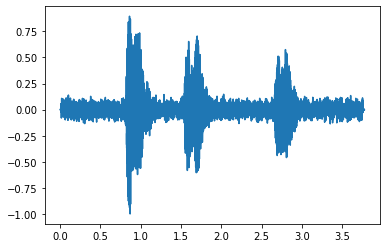

In [47]:
sos = signal.butter(4, 400, 'lp', fs=fs, output='sos')
filtered = signal.sosfilt(sos, x)
t = np.arange(0,len(x)/fs,1/fs)
plt.plot(t, x)
plt.show()

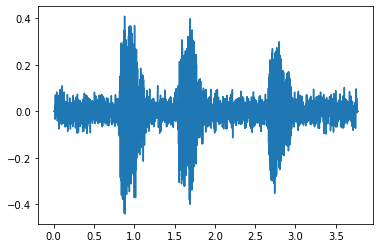

In [48]:
plt.plot(t, filtered)

In [49]:
fs

44100

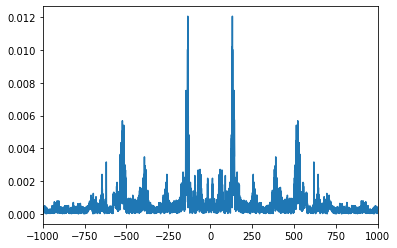

(-1000, 1000)

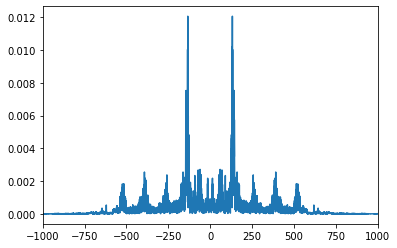

In [50]:
X = (1/len(x))*np.fft.fftshift(np.fft.fft(x))
f = np.linspace(-0.5*fs,0.5*fs,len(x)+1)[:-1]
plt.plot(f,np.abs(X))
plt.xlim([-1000,1000])
plt.show()
Y = (1/len(filtered))*np.fft.fftshift(np.fft.fft(filtered))
f = np.linspace(-0.5*fs,0.5*fs,len(filtered)+1)[:-1]
plt.plot(f,np.abs(Y))
plt.xlim([-1000,1000])

In [51]:
write('testout.wav',fs,filtered)

In [31]:
sos

array([[ 3.97111919e-08,  7.94223838e-08,  3.97111919e-08,
         1.00000000e+00, -1.94791403e+00,  9.48705125e-01],
       [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.97762572e+00,  9.78428884e-01]])

In [52]:
%reset -f